<img src="http://sonetodigital.com.br/adm/wp-content/uploads/2018/12/logo-fiap.png" width="150" align="left"/>

<br/><br/>

<font size=5 color="#ed145b"><b> Sistemas para internet </b></font><font size=5 color="#ed145b"> - Inteligência Artificial e Machine Learning </font>

<font size=4 color="#ed145b"> Profa. Thais Rodrigues Neubauer - profthais.neubauer@fiap.com.br</font>

<font size=5 ><b>Aula 01</b></font>

## Introdução a Python

Abra o nosso repositório no [Binder](https://mybinder.org/v2/gh/thaisneubauer/FIAP-3ECA-IA/master)

In [1]:
import pandas as pd
import numpy as np

In [204]:
data = pd.read_csv("student-mat.csv", sep=";")

In [205]:
data["Situation"] = data.G3 >= data.G3.max() / 2

In [206]:
data.Situation = data.Situation.map({True: "Approved", False: "Reproved"})

In [207]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Situation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Reproved
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Reproved
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Approved
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Approved
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,Reproved
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,Approved
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,Reproved
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,Approved


In [208]:
from sklearn import preprocessing
data = data.apply(preprocessing.LabelEncoder().fit_transform)

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividindo x e y
x = data.drop(columns=["Situation","G3"])
# x = data.drop(columns=["Situation","G3","G1","G2"])
y = data['Situation']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [254]:
# Treinando o modelo
model = LogisticRegression(verbose=10,solver='lbfgs', max_iter=10000).fit(x_train, y_train)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0])

In [255]:
pd.DataFrame({'pred': y_pred, 'resp': y_test})

,pred,resp
78,1,0
371,0,0
248,1,1
55,0,0
390,1,1
...,...,...
281,0,0
245,0,0
250,1,1
218,1,1


In [256]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9243697478991597

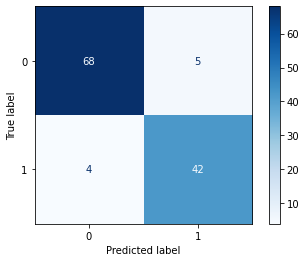

In [257]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import plot_confusion_matrix
_ = plot_confusion_matrix(model, x_test, y_test, cmap = 'Blues', values_format='.0f') #normalize = 'true')

In [258]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0])

In [259]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.907563025210084

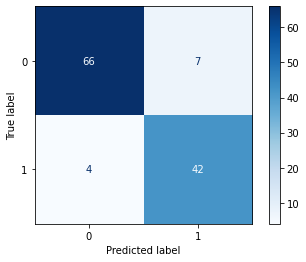

In [261]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import plot_confusion_matrix
_ = plot_confusion_matrix(model, x_test, y_test, cmap = 'Blues', values_format='.0f') #normalize = 'true')